In [1]:
%pylab inline

import sys
sys.path.insert(0,'C:\Users\Julia\Documents\Travail\M1 Berlin\markov_chains\spmcmm')

import clustering.edit as cl
import estimation.estimation as est
import simpleDataImporter as dataImp
import analysis.analysis as ana

Populating the interactive namespace from numpy and matplotlib


Import data.

In [2]:
filename = 'C:\Users\Julia\Documents\Travail\M1 Berlin\markov_chains\spmcmm\data\MCMM\example_1.dat'
data_importer = dataImp.SimpleDataImporter(filename, i_delimiter=' ')

Plot of the distribution of the sample 

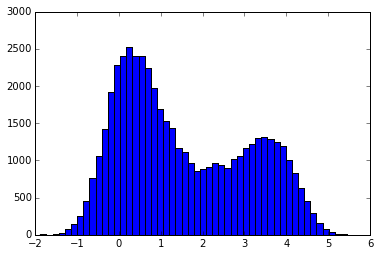

In [3]:
data = data_importer.get_data()
if 1 < data.shape[1]:
    # plt.plot(data[:, 0], data[:, 1])
    plt.scatter(data[:, 0], data[:, 1])
    # plt.hist2d(data[:, 0], data[:, 1], bins=50)
else:
    plt.hist(data, bins=50)
plt.show()

**K-means clustering**

In [4]:
k = 5
cluster = cl.kMeans(data, k)
cluster.discretize()

[[ 1.27444749]
 [ 0.21769798]
 [-0.1863776 ]
 [-0.23711238]
 [ 1.71113365]]


Space for k-means plots.

**Estimation of transition matrix**

In [5]:
chain = np.asarray(cluster.get_labels(), dtype=np.int64)
count_mat = est.compute_count_matrix(chain, i_tau=1)
trans_mat = est.estimate_transition_matrix(count_mat, 10000, 1e-3)

Plot of $\Pi T$ with $\Pi = diag(\pi)$ and with stationary distribution $\pi$.

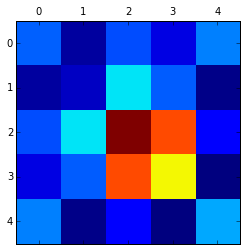

In [6]:
is_reversible, check_mat = est.check_reversibility(trans_mat)
plt.matshow(check_mat)
plt.show()

**Analysis of markov chain and transition matrix**

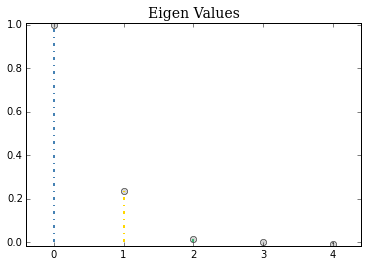

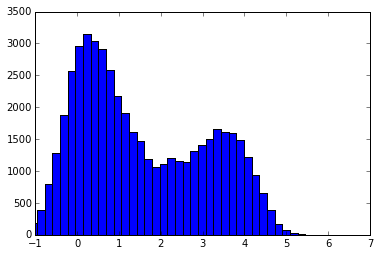

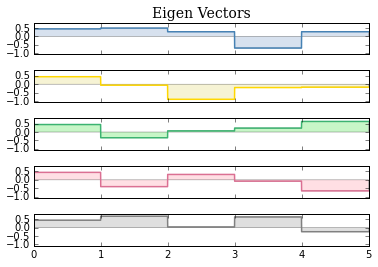

In [54]:
import analysis.plots as pls
mm = ana.MarkovModel(trans_mat)

#plot transition matrix
#pls.plotHeatMap(trans_mat)

mm.eigenVectors()
pls.plotEigValues(mm.eigVal)

data = data_importer.get_data()
if 1 < data.shape[1]:
    # plt.plot(data[:, 0], data[:, 1])
    plt.plot(data[:, 0], data[:, 1])
    # plt.hist2d(data[:, 0], data[:, 1], bins=50)
else:
    plt.hist(data, bins=40)
    plt.axis((-1,7,0,3500))
plt.show()

pls.plotEigVectors(mm.eigVec)

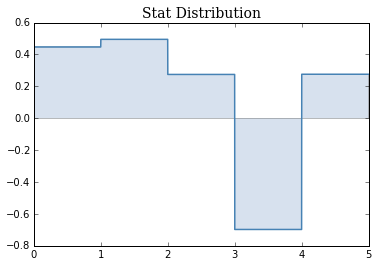

In [42]:
import matplotlib.font_manager as fm

# Plotting stuff
colors =    [['lightsteelblue', 'steelblue'], ['palegoldenrod', 'gold'], \
            ['lightgreen', 'mediumseagreen'], ['pink', 'palevioletred'], \
            ['silver','gray'], ['bisque', 'darksalmon'], ['thistle','mediumorchid'], ['paleturquoise', 'mediumturquoise']]
colors = colors*100

font = fm.FontProperties(size=14)
font.set_family('serif')
font.set_weight('light')
# End plotting stuff

mm.statDistribution()

def plotStatDist(statDist):
    bins = 1000                     # number of bins
    x = np.arange(0,len(statDist), 1./bins)     # x axis (arbitrary unit)

    f, ax = plt.subplots(1)
    
    # add space between subplots
    f.subplots_adjust(hspace=.5)
    
    ax.set_title('Stat Distribution', fontproperties = font)

    minXLim = 0
    maxXLim = 1.
    minYLim = np.min(statDist)-0.2*abs(np.min(statDist))
    maxYLim = np.max(statDist)*1.2
    # duplicate each value bins times
    y = [v for v in statDist for _ in range(bins)]
    
    ax.fill_between(x,0,y, facecolor=colors[0][0], alpha=0.5,linewidth=0.5)
    ax.plot(x,y,linewidth=1.5, color=colors[0][1])
    
    plt.show()

plotStatDist(mm.statDist)

C:\Users\Julia\Miniconda\lib\site-packages\IPython\kernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


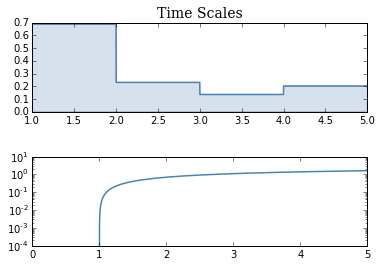

In [47]:
# timescales
mm.timescales()

def plotTimeScales(timeScales):
    bins = 1000                     # number of bins
    x = np.arange(0,len(timeScales), 1./bins)     # x axis (arbitrary unit)

    f, ax = plt.subplots(2)
    
    # add space between subplots
    f.subplots_adjust(hspace=.5)
    
    ax[0].set_title('Time Scales', fontproperties = font)

    minXLim = 0
    maxXLim = 1.
    minYLim = np.min(timeScales)-0.2*abs(np.min(timeScales))
    maxYLim = np.max(timeScales)*1.2
    # duplicate each value bins times
    y = [v for v in timeScales for _ in range(bins)]
    
    ax[0].fill_between(x,0,y, facecolor=colors[0][0], alpha=0.5,linewidth=0.5)
    ax[0].plot(x,y,linewidth=1.5, color=colors[0][1])
    
    ax[1].plot(x,map(lambda y : np.log(y),x), linewidth = 1.5, color = colors[0][1])
    ax[1].set_yscale('log')
    plt.show()

plotTimeScales(mm.timeScales)

In [52]:
# PCCA
nbClusters = 3
mm.PCCA(nbClusters)

#pls.plotHeatMap(mm.pcca)

C:\Users\Julia\Miniconda\lib\site-packages\pyEMMA-1.2.1-py2.7-win-amd64.egg\pyemma\msm\analysis\api.py:1484: DeprecationWarning: pcca method is deprecated because of its unspecific naming and will be removed soon. Use pcca_memberships in the future.
  'Use pcca_memberships in the future.', DeprecationWarning)


array([[  1.38777878e-16,   7.18928604e-01,   2.81071396e-01],
       [  9.99963940e-01,   5.24311630e-06,   3.08166693e-05],
       [  2.08624369e-01,   3.12250226e-17,   7.91375631e-01],
       [  7.52541258e-06,   1.05731728e-02,   9.89419302e-01],
       [  1.83471111e-01,   8.16528889e-01,   0.00000000e+00]])

**Transition Path Theory**

In [14]:
a = [0]
b = [1,3]
tpt = ana.TPT(trans_mat,a,b)

array([[ 0.        ,  0.06890711,  0.07105042,  0.07858131,  0.06291764],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.0119566 ,  0.        ,  0.01958328,  0.        ],
       [ 0.        , -0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.01684691,  0.01068049,  0.01640408,  0.        ]])

In [40]:
#Forward & backward committors
tpt.forwardCommittor()
tpt.backwardCommittor()

# proba current
tpt.probabilityCurrent()

# effective proba current
tpt.effectiveProbabilityCurrent()

# flux
tpt.filux()

#transition rate
tpt.transitionrate()

#mean first passage time
tpt.meanfirstpassagetime()

#mean current example
a = [1]
b = [3]
w = [1,2,4,2,4,3]

tpt_example = ana.TPT(trans_mat,a,b)
tpt_example.minCurrent(w)

0.0